<a href="https://colab.research.google.com/github/Patsonu63/Fashion-Recommendations-using-Image-Features/blob/main/Fashion_Recommendations_using_Image_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

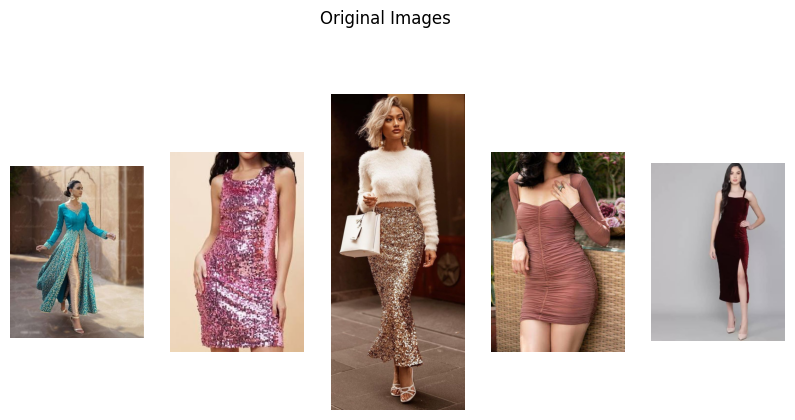

In [1]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt

# define the path to the uploaded zip file
zip_file_path = '/content/women-fashion.zip'
extract_folder_path = '/content/women fashion'

# extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# define function to load images
def load_images(image_folder_path, image_files):
    images = []
    for file_name in image_files:
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.webp')):
            img_path = os.path.join(image_folder_path, file_name)
            img = Image.open(img_path).convert('RGB')
            images.append(img)
    return images

# load images
image_folder_path = os.path.join(extract_folder_path, 'women fashion')
image_files = [file for file in os.listdir(image_folder_path) if file.lower().endswith(('jpg', 'jpeg', 'png', 'webp'))]
images = load_images(image_folder_path, image_files)

# display original images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

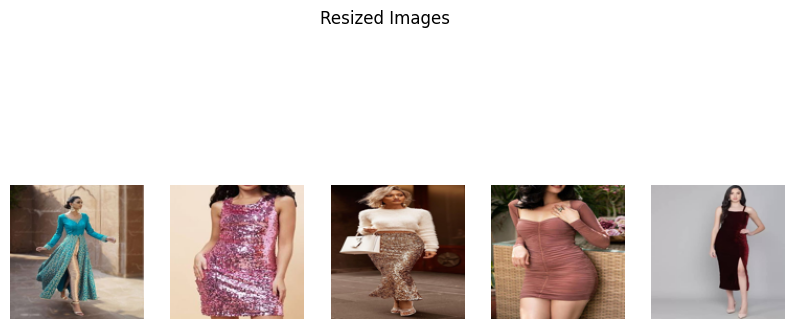

In [2]:
# function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# resize images
resized_images = resize_images(images)

# display resized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.axis('off')
plt.suptitle('Resized Images')
plt.show()

In [3]:
import numpy as np

# function to normalize images
def normalize_images(images):
    normalized_images = [np.array(img) / 255.0 for img in images]
    return np.array(normalized_images)

# normalize images
normalized_images = normalize_images(resized_images)

# print the array of original vs normalized images for the first image
print("Original Image Array:")
print(np.array(resized_images[0]))

print("\nNormalized Image Array:")
print(normalized_images[0])

Original Image Array:
[[[ 26  20  10]
  [ 23  20  13]
  [ 22  22  16]
  ...
  [ 99  62  41]
  [102  70  53]
  [144 116 104]]

 [[ 33  17  11]
  [ 26  16  11]
  [ 25  20  14]
  ...
  [ 97  61  39]
  [103  71  55]
  [145 118 106]]

 [[ 33  16  11]
  [ 28  16  11]
  [ 25  20  13]
  ...
  [ 98  61  40]
  [104  72  56]
  [145 118 106]]

 ...

 [[124 114 113]
  [127 117 116]
  [130 120 119]
  ...
  [204 186 163]
  [203 186 163]
  [208 190 168]]

 [[122 112 111]
  [125 115 114]
  [129 119 118]
  ...
  [184 170 152]
  [189 174 157]
  [198 182 166]]

 [[123 113 112]
  [123 113 112]
  [126 116 115]
  ...
  [153 141 129]
  [155 142 131]
  [169 156 144]]]

Normalized Image Array:
[[[0.10196078 0.07843137 0.03921569]
  [0.09019608 0.07843137 0.05098039]
  [0.08627451 0.08627451 0.0627451 ]
  ...
  [0.38823529 0.24313725 0.16078431]
  [0.4        0.2745098  0.20784314]
  [0.56470588 0.45490196 0.40784314]]

 [[0.12941176 0.06666667 0.04313725]
  [0.10196078 0.0627451  0.04313725]
  [0.09803922 0.078

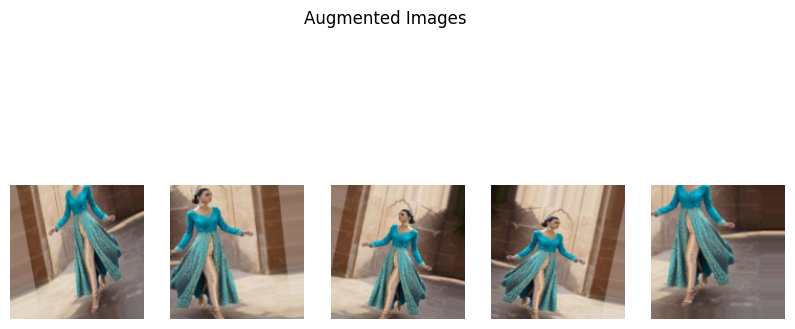

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# example: augment a single image
sample_image = normalized_images[0]
sample_image = np.expand_dims(sample_image, axis=0)
aug_iter = datagen.flow(sample_image)

# display augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    batch = next(aug_iter)
    image_aug = batch[0]
    plt.imshow(image_aug)
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

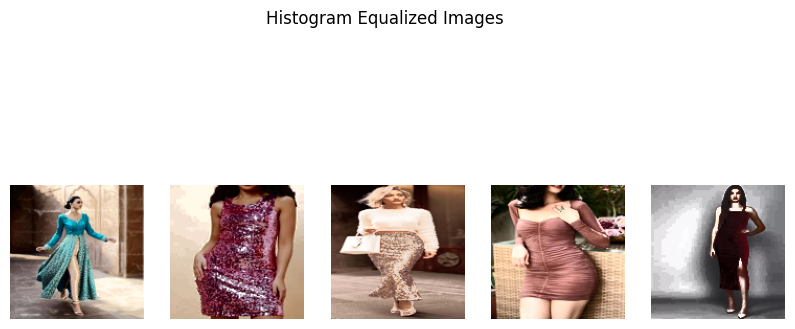

In [5]:
import cv2
# function to apply histogram equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return Image.fromarray(img_equalized)

# apply histogram equalization to all images
equalized_images = [histogram_equalization(img) for img in resized_images]

# display histogram equalized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(equalized_images[i])
    plt.axis('off')
plt.suptitle('Histogram Equalized Images')
plt.show()

In the above code, we are defining and using a function to apply histogram equalization to a list of images to enhance their contrast. The histogram_equalization function converts an image from RGB to YUV colour space to perform histogram equalization on the Y (luminance) channel and then converts the image back to RGB colour space. This process is applied to each image in the list of resized images to create a new list of contrast-enhanced images.